In [1]:
import yfinance as yf
import pandas_ta as ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def rsi_strategy(ticker='SPY', start_date='2000-01-01', rsi_length=2, rsi_threshold=15, transaction_cost=0.001):

    df = pd.DataFrame(yf.download(ticker, start=start_date))[['Close','High']]
    df['returns'] = df['Close'].pct_change()
    df['rsi'] = ta.rsi(df['Close'], length=rsi_length)
    df['position'] = 0
    df.loc[(df['rsi'] < rsi_threshold) & (df['position'] == 0), 'position'] = 1

    df['vende'] = (df['Close'] > df['High'].shift(1))
    df['position'] = np.where(df['vende'], 0, df['position'])

    df['strategy_returns'] = df['position'].shift(1) * df['returns']
    df['transaction_cost'] = np.abs(df['position'].diff()) * transaction_cost
    df['net_strategy_returns'] = df['strategy_returns'] - df['transaction_cost']

    df['net_strategy_returns_cumret'] = (1 + df['net_strategy_returns']).cumprod()
    df['cumret'] = (1 + df['returns']).cumprod()

    num_trades = len(df[df['position'].diff() != 0])
    total_transaction_cost = df['transaction_cost'].sum()

    print(f"Number of trades: {num_trades}")
    print(f"Total transaction costs: {total_transaction_cost:.2f}")

    plt.plot(df.index, df['net_strategy_returns_cumret'], label=f'{ticker} Strategy')
    plt.plot(df.index, df['cumret'], label=f'{ticker} Returns', linestyle='--')
    plt.title(f'{ticker} Strategy with Transaction Costs')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()

    return df

[*********************100%***********************]  1 of 1 completed


Number of trades: 961
Total transaction costs: 0.00


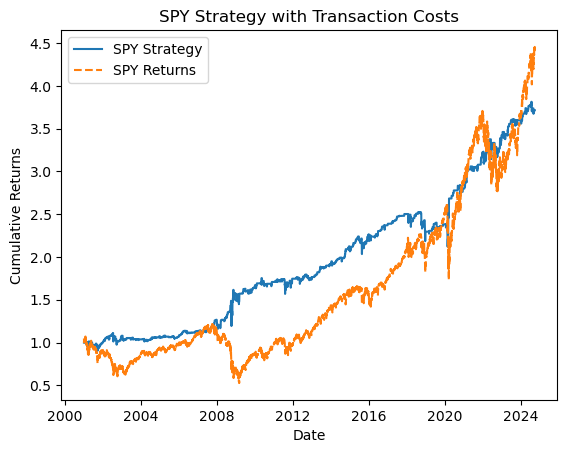

In [16]:
df_result = rsi_strategy(ticker='SPY', start_date='2001-01-01', rsi_length=2, rsi_threshold=15, transaction_cost=0)